<a href="https://colab.research.google.com/github/TsaniAflah/Perolehan-Mendali-pada-Olympic-2021/blob/main/TUGAS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Tsani Aflah

Npm : 2008107010015

Kelas : Prak.Visualisasi Data B



---



**EXPLORATORY DATA ANALYSIS**

In [ ]:
pip install openpyxl

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image # converting images into arrays

In [ ]:
df_can = pd.read_csv('Tokyo 2021 dataset v4.csv')

In [ ]:
df_can.head()

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode,Continent
0,1,United States of America,39,41,33,113,1,USA,North America
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia
2,3,Japan,27,14,17,58,5,JPN,Asia
3,4,Great Britain,22,21,22,65,4,GBR,Europe
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia


In [ ]:
print(df_can.shape)

(93, 9)


In [ ]:
df_can.drop(["Rank by Total", "NOCCode", "Rank"], axis=1, inplace=True)

In [ ]:
df_can.head()

,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Continent
0,United States of America,39,41,33,113,North America
1,People's Republic of China,38,32,18,88,Asia
2,Japan,27,14,17,58,Asia
3,Great Britain,22,21,22,65,Europe
4,ROC,20,28,23,71,Europe/Asia


In [ ]:
df_can.rename(columns={'Team/NOC':'Country'}, inplace=True)

df_can.head()

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Continent
0,United States of America,39,41,33,113,North America
1,People's Republic of China,38,32,18,88,Asia
2,Japan,27,14,17,58,Asia
3,Great Britain,22,21,22,65,Europe
4,ROC,20,28,23,71,Europe/Asia


In [ ]:
all(isinstance(column, str) for column in df_can.columns)

True

In [ ]:
df_can.head()

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Continent
0,United States of America,39,41,33,113,North America
1,People's Republic of China,38,32,18,88,Asia
2,Japan,27,14,17,58,Asia
3,Great Britain,22,21,22,65,Europe
4,ROC,20,28,23,71,Europe/Asia


In [ ]:
print('data dimensions:', df_can.shape)

data dimensions: (93, 6)


In [ ]:
df_can.set_index('Country', inplace=True)

In [ ]:
df_top10 = df_can.sort_values(['Total'], ascending=False, axis=0).head(10)
  
df_top10

,Gold Medal,Silver Medal,Bronze Medal,Total,Continent
Country,,,,,
United States of America,39,41,33,113,North America
People's Republic of China,38,32,18,88,Asia
ROC,20,28,23,71,Europe/Asia
Great Britain,22,21,22,65,Europe
Japan,27,14,17,58,Asia
Australia,17,7,22,46,Australia
Italy,10,10,20,40,Europe
Germany,10,11,16,37,Europe
Netherlands,10,12,14,36,Europe




---



---



**F I L T E R I N G**

In [ ]:
condition = df_can['Gold Medal'] == '50'

print(condition)

Country
United States of America      False
People's Republic of China    False
Japan                         False
Great Britain                 False
ROC                           False
                              ...  
Ghana                         False
Grenada                       False
Kuwait                        False
Republic of Moldova           False
Syrian Arab Republic          False
Name: Gold Medal, Length: 93, dtype: bool


In [ ]:
print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(8)

data dimensions: (93, 5)
Index(['Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total', 'Continent'], dtype='object')


,Gold Medal,Silver Medal,Bronze Medal,Total,Continent
Country,,,,,
United States of America,39,41,33,113,North America
People's Republic of China,38,32,18,88,Asia
Japan,27,14,17,58,Asia
Great Britain,22,21,22,65,Europe
ROC,20,28,23,71,Europe/Asia
Australia,17,7,22,46,Australia
Netherlands,10,12,14,36,Europe
France,10,12,11,33,Europe




---



---



*Import Matplotlib.*

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.2.2




---



---



**WAFFLE  CHARTS**

In [ ]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

df_dsn

,Gold Medal,Silver Medal,Bronze Medal,Total,Continent
Country,,,,,
Denmark,3,4,4,11,Europe
Norway,4,2,2,8,Europe
Sweden,3,6,0,9,Europe


In [ ]:
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total'] / total_values


pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Country,
Denmark,0.392857
Norway,0.285714
Sweden,0.321429


In [ ]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


In [ ]:
# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

,Number of tiles
Country,
Denmark,157
Norway,114
Sweden,129


In [ ]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [ ]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 432x288 with 0 Axes>

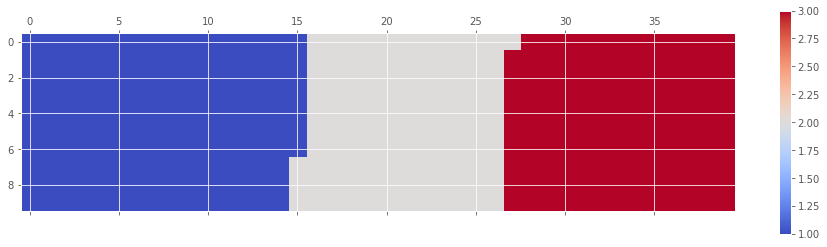

In [ ]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 432x288 with 0 Axes>

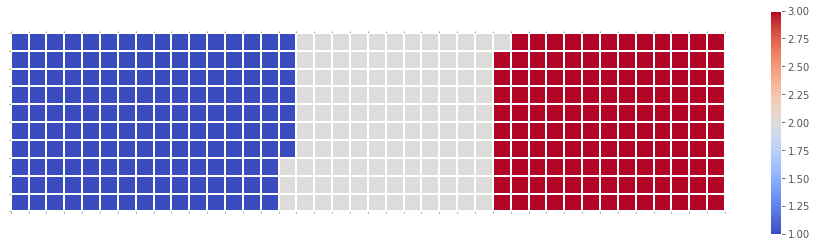

In [ ]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

<Figure size 432x288 with 0 Axes>

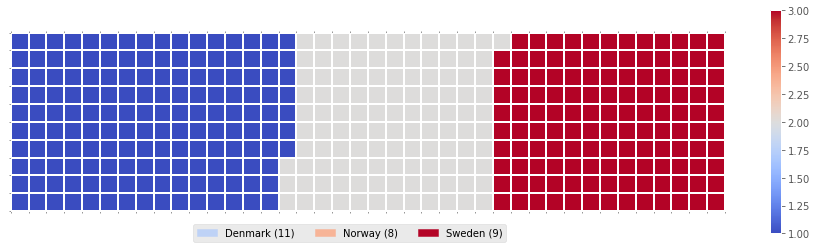

In [ ]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

In [ ]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [ ]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 157
Norway: 114
Sweden: 129


<Figure size 432x288 with 0 Axes>

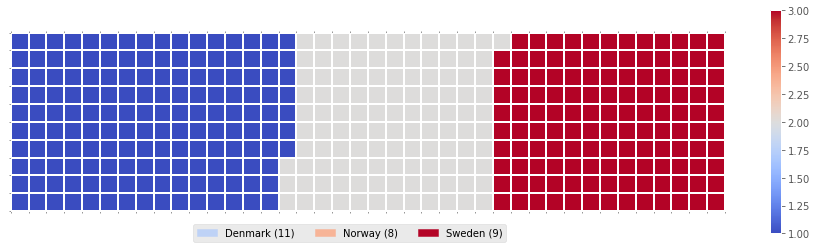

In [ ]:
create_waffle_chart(categories, values, height, width, colormap) 



---



---



**WORD CLOUDS**

In [ ]:
# install wordcloud
!pip3 install wordcloud==1.8.1

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

     |████████████████████████████████| 366 kB 5.3 MB/s 
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0
Wordcloud is installed and imported!


In [ ]:
import urllib

# open the file and read it into a variable alice_novel
Olympics = urllib.request.urlopen('https://raw.githubusercontent.com/TsaniAflah/Perolehan-Mendali-pada-Olympic-2021/main/Olympic%20Games%20Tokyo%202020.txt').read().decode("utf-8")

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
# instantiate a word cloud object
Olympics_wc = WordCloud(
    background_color='white',
    max_words=2000, #took 2000 words on first teks
    stopwords=stopwords
)

# generate the word cloud
Olympics_wc.generate(Olympics)

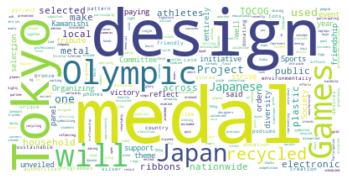

In [ ]:
# display the word cloud
plt.imshow(Olympics_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

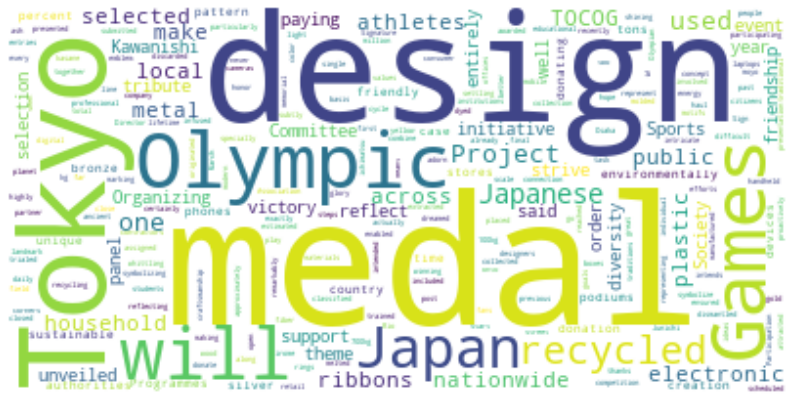

In [ ]:
fig = plt.figure(figsize=(14, 18))

# display the cloud
plt.imshow(Olympics_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

*Note : re-generate the cloud to make it more informative*

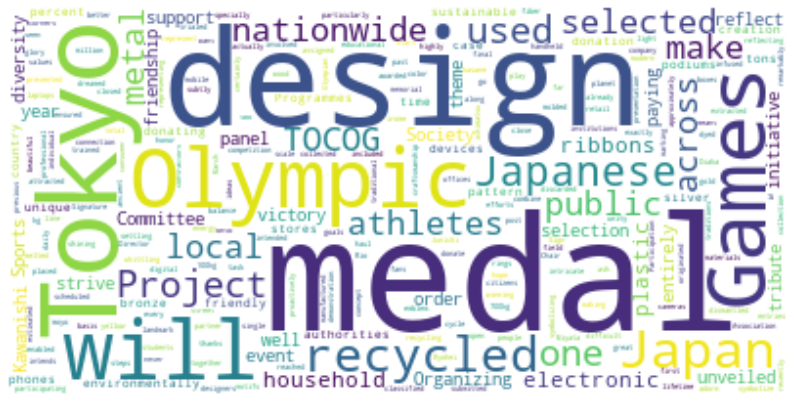

In [ ]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
Olympics_wc.generate(Olympics)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(Olympics_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
Olympics_mask = np.array(Image.open(urllib.request.urlopen('https://s3.amazonaws.com/freestock-prod/450/freestock_571053598.jpg')))

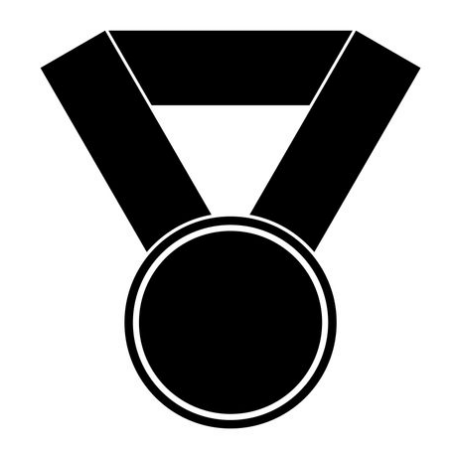

In [ ]:
fig = plt.figure(figsize=(8, 10))

plt.imshow(Olympics_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

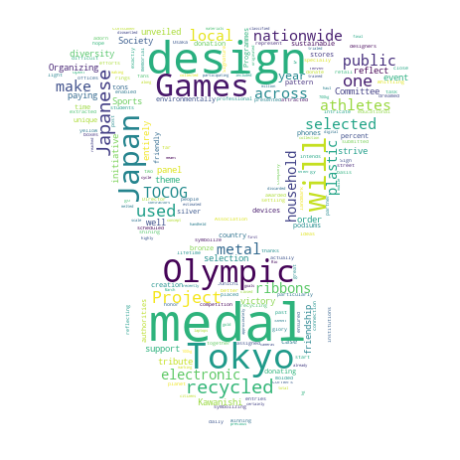

In [ ]:
# instantiate a word cloud object
Olympics_wc = WordCloud(background_color='white', max_words=2000, mask=Olympics_mask, stopwords=stopwords)

# generate the word cloud
Olympics_wc.generate(Olympics)

# display the word cloud
fig = plt.figure(figsize=(8, 10))

plt.imshow(Olympics_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_can.head()

,Gold Medal,Silver Medal,Bronze Medal,Total,Continent
Country,,,,,
United States of America,39,41,33,113,North America
People's Republic of China,38,32,18,88,Asia
Japan,27,14,17,58,Asia
Great Britain,22,21,22,65,Europe
ROC,20,28,23,71,Europe/Asia


In [ ]:
total_medals = df_can['Total'].sum()
total_medals

1080

In [ ]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_medals * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'Japan Japan Japan Japan ROC ROC ROC ROC ROC Australia Australia Australia Netherlands Netherlands Netherlands France France Germany Germany Germany Italy Italy Italy Canada Canada Brazil Cuba Hungary Poland Spain Switzerland Turkey Ukraine '

In [ ]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


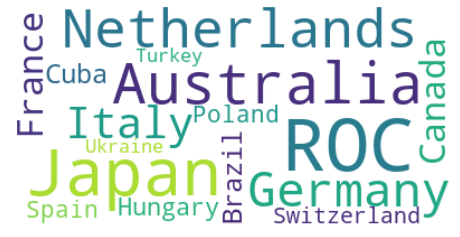

In [ ]:
# display the cloud
plt.figure(figsize=(8, 12))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



---



---



 **SEABORN AND REGRESSION PLOTS**

In [ ]:
# install seaborn
# !pip3 install seaborn

# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


In [ ]:
df_can1 = pd.read_csv('Australian religion 1881 - 2016.csv')

In [ ]:
df_can1.drop(["1881", "1882", "1883", "1884", "1885", "1886", "1887", "1888", "1889", "1890"], axis=1, inplace=True)

In [ ]:
df_can1.head()

,Religion,1891,1892,1893,1894,1895,1896,1897,1898,1899,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Uniting Church,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,293691.4,288040.8,282390.2,276739.6,271089,260322.8,249556.6,238790.4,228024.2,217258
1,Presbyterian,109413.0,111734.1,114055.2,116376.3,118697.4,121018.5,123339.6,125660.7,127981.8,...,217707.2,216273.4,214839.6,213405.8,211972,207244.2,202516.4,197788.6,193060.8,188333
2,Other Christian,8622.0,8841.7,9061.4,9281.1,9500.8,9720.5,9940.2,10159.9,10379.6,...,33511.6,57788.2,82064.8,106341.4,130618,138970.8,147323.6,155676.4,164029.2,172382
3,Baptist,13112.0,13462.6,13813.2,14163.8,14514.4,14865.0,15215.6,15566.2,15916.8,...,97151.0,97832.0,98513.0,99194.0,99875,98828.6,97782.2,96735.8,95689.4,94643
4,Pentecostal,NaN,0.7,1.4,2.1,2.8,3.5,4.2,4.9,5.6,...,70510.0,72076.0,73642.0,75208.0,76774,77485.2,78196.4,78907.6,79618.8,80330


In [ ]:
df_can1.rename(columns={'Religion':'Belief'}, inplace=True)

In [ ]:
df_can1.head()

,Belief,1891,1892,1893,1894,1895,1896,1897,1898,1899,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Uniting Church,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,293691.4,288040.8,282390.2,276739.6,271089,260322.8,249556.6,238790.4,228024.2,217258
1,Presbyterian,109413.0,111734.1,114055.2,116376.3,118697.4,121018.5,123339.6,125660.7,127981.8,...,217707.2,216273.4,214839.6,213405.8,211972,207244.2,202516.4,197788.6,193060.8,188333
2,Other Christian,8622.0,8841.7,9061.4,9281.1,9500.8,9720.5,9940.2,10159.9,10379.6,...,33511.6,57788.2,82064.8,106341.4,130618,138970.8,147323.6,155676.4,164029.2,172382
3,Baptist,13112.0,13462.6,13813.2,14163.8,14514.4,14865.0,15215.6,15566.2,15916.8,...,97151.0,97832.0,98513.0,99194.0,99875,98828.6,97782.2,96735.8,95689.4,94643
4,Pentecostal,NaN,0.7,1.4,2.1,2.8,3.5,4.2,4.9,5.6,...,70510.0,72076.0,73642.0,75208.0,76774,77485.2,78196.4,78907.6,79618.8,80330


In [ ]:
all(isinstance(column, str) for column in df_can1.columns)

True

In [ ]:
df_can1.set_index('Belief', inplace=True)

,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Belief,,,,,,,,,,,,,,,,,,,,,
Uniting Church,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,293691.4,288040.8,282390.2,276739.6,271089,260322.8,249556.6,238790.4,228024.2,217258
Presbyterian,109413.0,111734.1,114055.2,116376.3,118697.4,121018.5,123339.6,125660.7,127981.8,130302.9,...,217707.2,216273.4,214839.6,213405.8,211972,207244.2,202516.4,197788.6,193060.8,188333
Other Christian,8622.0,8841.7,9061.4,9281.1,9500.8,9720.5,9940.2,10159.9,10379.6,10599.3,...,33511.6,57788.2,82064.8,106341.4,130618,138970.8,147323.6,155676.4,164029.2,172382
Baptist,13112.0,13462.6,13813.2,14163.8,14514.4,14865.0,15215.6,15566.2,15916.8,16267.4,...,97151.0,97832.0,98513.0,99194.0,99875,98828.6,97782.2,96735.8,95689.4,94643
Pentecostal,NaN,0.7,1.4,2.1,2.8,3.5,4.2,4.9,5.6,6.3,...,70510.0,72076.0,73642.0,75208.0,76774,77485.2,78196.4,78907.6,79618.8,80330


In [ ]:
df_can1.drop(["Uniting Church"], axis=0, inplace=True)

In [ ]:
df_can1.head()

,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Belief,,,,,,,,,,,,,,,,,,,,,
Presbyterian,109413.0,111734.1,114055.2,116376.3,118697.4,121018.5,123339.6,125660.7,127981.8,130302.9,...,217707.2,216273.4,214839.6,213405.8,211972,207244.2,202516.4,197788.6,193060.8,188333
Other Christian,8622.0,8841.7,9061.4,9281.1,9500.8,9720.5,9940.2,10159.9,10379.6,10599.3,...,33511.6,57788.2,82064.8,106341.4,130618,138970.8,147323.6,155676.4,164029.2,172382
Baptist,13112.0,13462.6,13813.2,14163.8,14514.4,14865.0,15215.6,15566.2,15916.8,16267.4,...,97151.0,97832.0,98513.0,99194.0,99875,98828.6,97782.2,96735.8,95689.4,94643
Pentecostal,NaN,0.7,1.4,2.1,2.8,3.5,4.2,4.9,5.6,6.3,...,70510.0,72076.0,73642.0,75208.0,76774,77485.2,78196.4,78907.6,79618.8,80330
Eastern Orthodox,NaN,56.1,112.2,168.3,224.4,280.5,336.6,392.7,448.8,504.9,...,214428.0,215921.0,217414.0,218907.0,220400,190495.8,160591.6,130687.4,100783.2,70879


In [ ]:
print('data dimensions:', df_can1.shape)

data dimensions: (33, 126)


In [ ]:
df_can1.dtypes

1891    float64
1892    float64
1893    float64
1894    float64
1895    float64
         ...   
2012    float64
2013    float64
2014    float64
2015    float64
2016      int64
Length: 126, dtype: object

In [ ]:
year = list(map(str, range(1990, 2016)))

year

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [ ]:
# we can use the sum() method to get the total population per year
df_tot1 = pd.DataFrame(df_can1[year].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot1.index = map(float, df_tot1.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot1.reset_index(inplace=True)

# rename columns
df_tot1.columns = ['years', 'total']

# view the final dataframe
df_tot1.head()

,years,total
0,1990.0,5302941.8
1,1991.0,5360047.0
2,1992.0,5414645.0
3,1993.0,5469243.0
4,1994.0,5523841.0


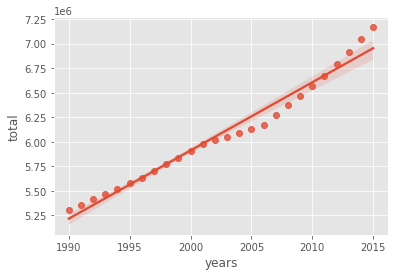

In [ ]:
sns.regplot(x='years', y='total', data=df_tot1)

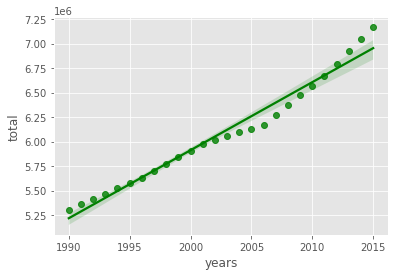

In [ ]:
sns.regplot(x='years', y='total', data=df_tot1, color='green')
plt.show()

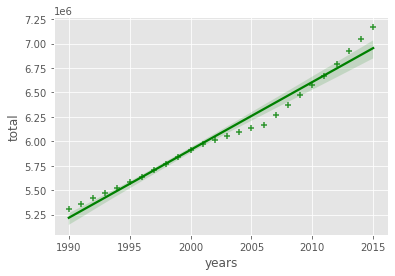

In [ ]:
ax = sns.regplot(x='years', y='total', data=df_tot1, color='green', marker='+')
plt.show()

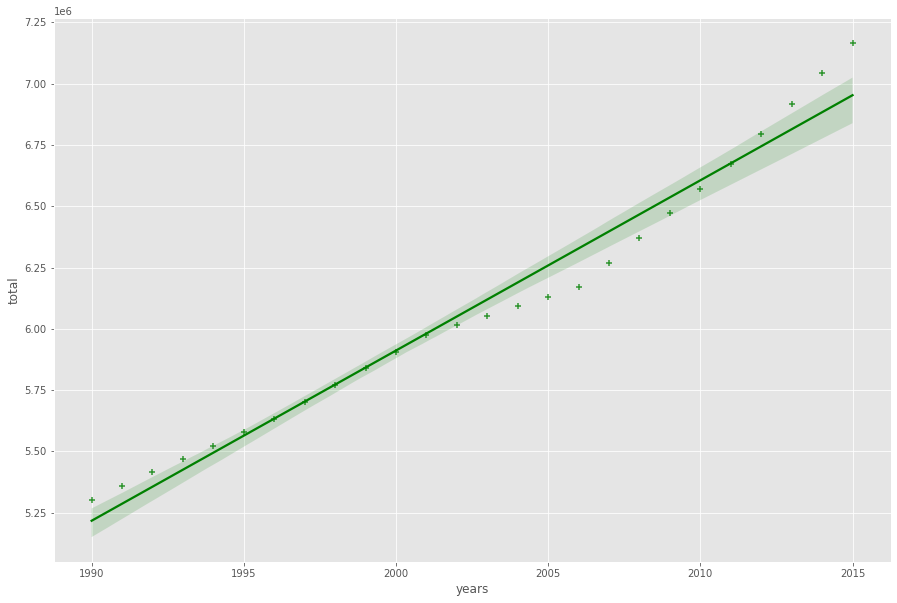

In [ ]:
plt.figure(figsize=(15, 10))
sns.regplot(x='years', y='total', data=df_tot1, color='green', marker='+')
plt.show()

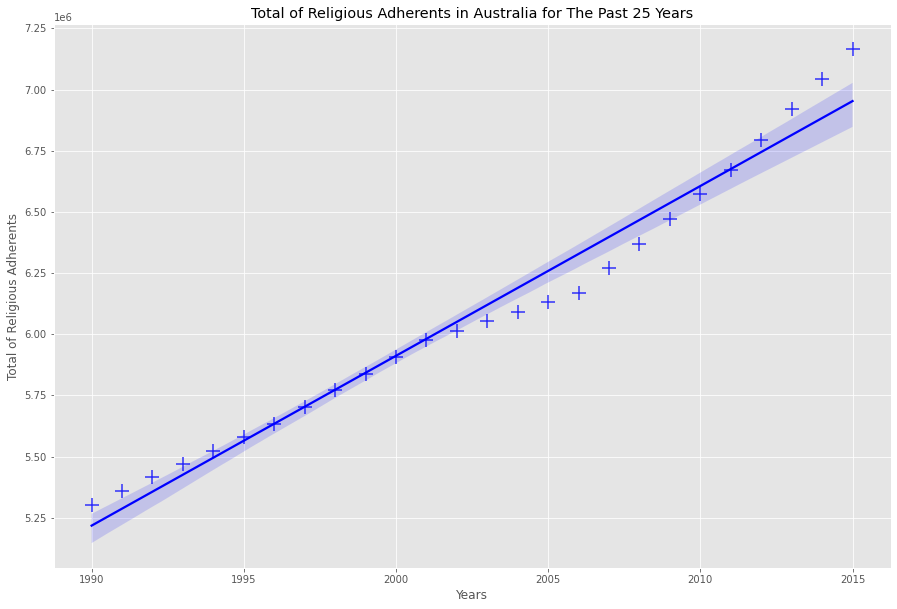

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='years', y='total', data=df_tot1, color='blue', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Years', ylabel='Total of Religious Adherents')
ax.set_title('Total of Religious Adherents in Australia for The Past 25 Years')
plt.show()

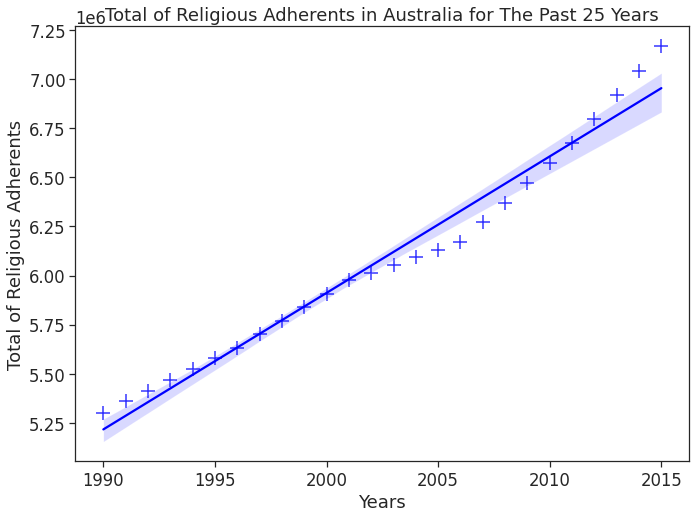

In [ ]:
plt.figure(figsize=(11, 8))

sns.set(font_scale=1.5)
sns.set_style('ticks')  # change background to white background

ax = sns.regplot(x='years', y='total', data=df_tot1, color='blue', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Years', ylabel='Total of Religious Adherents')
ax.set_title('Total of Religious Adherents in Australia for The Past 25 Years')
plt.show()

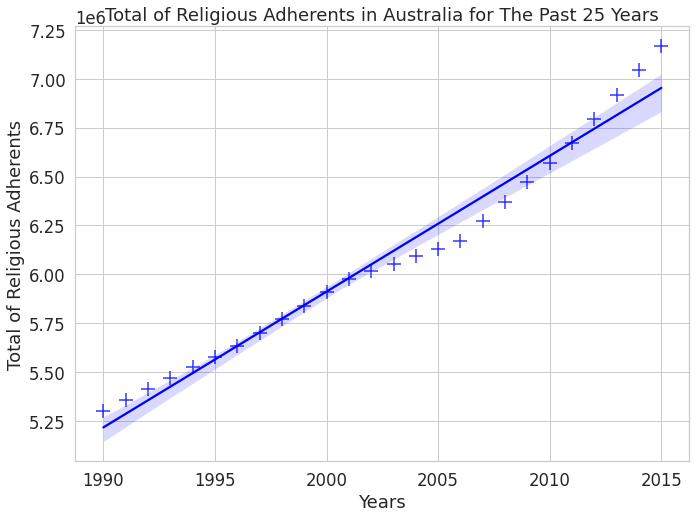

In [ ]:
plt.figure(figsize=(11, 8))

sns.set_style('whitegrid')

ax = sns.regplot(x='years', y='total', data=df_tot1, color='blue', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Years', ylabel='Total of Religious Adherents')
ax.set_title('Total of Religious Adherents in Australia for The Past 25 Years')
plt.show()



---



---



---

